In [4]:
!pip install praw

     |████████████████████████████████| 159 kB 4.2 MB/s eta 0:00:01


In [7]:
from pandas import DataFrame
# Create empty table
output_table = DataFrame()
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import ast
import nltk
import praw
from datetime import datetime
nltk.download('vader_lexicon')

import json
secrets = json.load(open("secrets.json"))

reddit = praw.Reddit(client_id=secrets['REDDIT_CLIENT_ID'], client_secret=secrets['REDDIT_API_KEY'], user_agent='testing')
posts = []
ml_subreddit = reddit.subreddit('wallstreetbets')
for post in ml_subreddit.hot(limit=1000):
    post_date = datetime.utcfromtimestamp(post.created)
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post_date])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])


# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created']


# Iterate through the title of subreddit posts and get the polarity scores using vader
scores = posts['title'].apply(vader.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
parsed_and_scored_news = posts.join(scores_df, rsuffix='_right')

reddit_sentiment_data = parsed_and_scored_news.sort_values(by=['created'], ascending=False)
reddit_sentiment_data.to_csv('wallstreetbets_data_vader.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rmoreira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
reddit_sentiment_data.head()

,title,score,id,subreddit,url,num_comments,body,created,neg,neu,pos,compound
95,Robinhood not calculating options wash sale co...,1,mkw2o2,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,1,"Sorry if this has been asked/answered before, ...",2021-04-06 06:00:14,0.000,1.000,0.000,0.0000
96,"YOLO on FUBO, 1500 shares at $21.72.",1,mkw02h,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,1,Took a position for the Lock Up Expiration pla...,2021-04-06 05:56:49,0.000,0.498,0.502,0.6166
47,GME Weeklies YOLO 😅 Guys please give me some c...,23,mkv95z,wallstreetbets,https://i.redd.it/wwovf5ye9fr61.jpg,36,,2021-04-06 05:21:59,0.073,0.416,0.511,0.8143
37,ASO Simple DD,47,mku6fa,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,21,"Currently at 2.87B mkt cap, 1.6B revenue Q2 x ...",2021-04-06 04:33:02,0.000,1.000,0.000,0.0000
40,Vroom vroom get on me rocket! 🚀🚀🚀,42,mku683,wallstreetbets,https://i.redd.it/1tpjqqrm0fr61.jpg,15,,2021-04-06 04:32:46,0.000,1.000,0.000,0.0000


In [10]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 3.8 MB/s eta 0:00:01


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import ast
from datetime import datetime


tickers = ['GME']
multiple_stocks = web.get_data_yahoo(tickers,
start = "2021-01-28",
end = "2021-02-28")
multiple_stocks_monthly_returns = multiple_stocks['Adj Close'].resample('D').ffill().pct_change()
multiple_stocks_monthly_returns


Symbols,GME
Date,
2021-01-28,NaN
2021-01-29,0.678719
2021-01-30,0.000000
2021-01-31,0.000000
2021-02-01,-0.307692
2021-02-02,-0.600000
2021-02-03,0.026778
2021-02-04,-0.421058
2021-02-05,0.191963


In [109]:
multiple_stocks

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GME,GME,GME,GME,GME,GME
Date,,,,,,
2021-01-28,193.600006,193.600006,483.000000,112.250000,265.000000,58815800
2021-01-29,325.000000,325.000000,413.980011,250.000000,379.709991,50259200
2021-02-01,225.000000,225.000000,322.000000,212.000000,316.559998,37382200
2021-02-02,90.000000,90.000000,158.000000,74.220001,140.759995,78183100
2021-02-03,92.410004,92.410004,113.400002,85.250000,112.010002,42698500
2021-02-04,53.500000,53.500000,91.500000,53.330002,91.190002,62427300
2021-02-05,63.770000,63.770000,95.000000,51.090000,54.040001,80886300
2021-02-08,60.000000,60.000000,72.660004,58.020000,72.410004,25687300


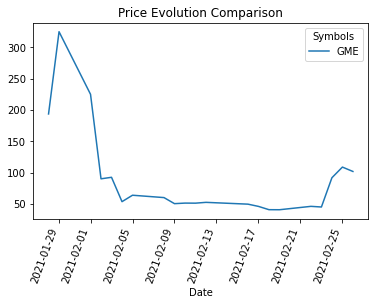

In [110]:
multiple_stocks['Adj Close'].plot()
plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.show()

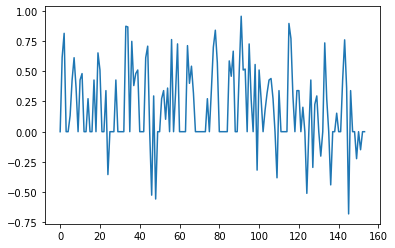

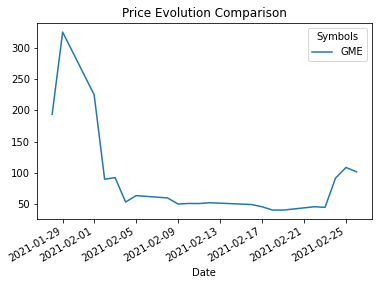

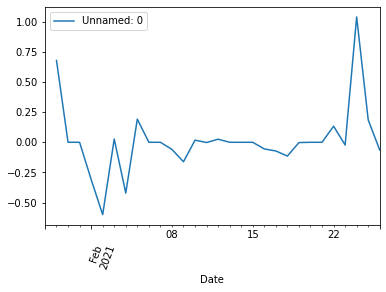

In [111]:
wsbdata = pd.read_csv("wallstreetbets_data_vader.csv") 
wsbdata['compound'].plot()
#wsbdata['neg'].plot()
#wsbdata['neu'].plot()
#wsbdata['pos'].plot()
multiple_stocks['Adj Close'].plot()
plt.title('Price Evolution Comparison')
multiple_stocks_monthly_returns.plot()
plt.xticks(rotation=70)
plt.legend(wsbdata.columns)
plt.show()

In [112]:
wsbdata[wsbdata['created'] < '2021-04-06']

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,neg,neu,pos,compound
37,55,New level of Autism unlocked: I'm not leaving ...,44,mknyky,wallstreetbets,https://i.redd.it/bdq4ipnhndr61.png,23,NaN,2021-04-05 23:57:19,0.052,0.824,0.124,0.3818
38,78,Stop claiming you have 💎 🤚 Show the proof My 🍒...,25,mknutm,wallstreetbets,https://www.reddit.com/gallery/mknutm,25,NaN,2021-04-05 23:52:33,0.066,0.776,0.159,0.4812
39,8,"AMC Yolo Update. Still here w/ all 178,727 com...",1805,mkmnks,wallstreetbets,https://www.reddit.com/gallery/mkmnks,164,NaN,2021-04-05 22:59:27,0.000,0.650,0.350,0.5106
40,23,Hindsight... shouldve bought the $160 dip at t...,400,mkmf7k,wallstreetbets,https://www.reddit.com/gallery/mkmf7k,73,NaN,2021-04-05 22:48:54,0.000,1.000,0.000,0.0000
41,66,Palantir and AbCellera are my main tickets to ...,30,mkm6sa,wallstreetbets,https://i.redd.it/bgso3jza9dr61.jpg,18,NaN,2021-04-05 22:38:22,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,AMC is NOT introducing 500M shares on May 4th....,2834,mi2jt1,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,966,Apologies if this is going to get skewered but...,2021-04-02 03:08:43,0.086,0.914,0.000,-0.2235
150,144,The Big Squeeze,8354,mhzs2y,wallstreetbets,https://v.redd.it/qvjb2zxeflq61,379,NaN,2021-04-02 01:02:34,0.000,1.000,0.000,0.0000
151,150,Deep Fiction - Call me Paper Hands one More Go...,3963,mhyv9r,wallstreetbets,https://v.redd.it/j136agoy5lq61,144,NaN,2021-04-02 00:20:30,0.207,0.626,0.167,-0.1494
152,141,Moderator's Update on Paper Trading Competitio...,35311,mhyf1k,wallstreetbets,https://v.redd.it/ez0air00zkq61,3409,NaN,2021-04-02 00:00:37,0.000,1.000,0.000,0.0000


In [114]:
s = pd.to_datetime(wsbdata['created'])
dff = s.groupby(s.dt.floor('d')).size().reset_index(name='count')

In [115]:
print(multiple_stocks.columns)

# df = pd.DataFrame([multiple_stocks['Date'], multiple_stocks['Adj Close']], columns=['date', 'price'])

# df = df.pivot(index='x', columns='color', values='y')

# df.plot()

MultiIndex([('Adj Close', 'GME'),
            (    'Close', 'GME'),
            (     'High', 'GME'),
            (      'Low', 'GME'),
            (     'Open', 'GME'),
            (   'Volume', 'GME')],
           names=['Attributes', 'Symbols'])


In [116]:
ndf = wsbdata.join(multiple_stocks_monthly_returns)
ndf

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,neg,neu,pos,compound,GME
0,95,Robinhood not calculating options wash sale co...,1,mkw2o2,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,1,"Sorry if this has been asked/answered before, ...",2021-04-06 06:00:14,0.000,1.000,0.000,0.0000,NaN
1,96,"YOLO on FUBO, 1500 shares at $21.72.",1,mkw02h,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,1,Took a position for the Lock Up Expiration pla...,2021-04-06 05:56:49,0.000,0.498,0.502,0.6166,NaN
2,47,GME Weeklies YOLO 😅 Guys please give me some c...,23,mkv95z,wallstreetbets,https://i.redd.it/wwovf5ye9fr61.jpg,36,NaN,2021-04-06 05:21:59,0.073,0.416,0.511,0.8143,NaN
3,37,ASO Simple DD,47,mku6fa,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,21,"Currently at 2.87B mkt cap, 1.6B revenue Q2 x ...",2021-04-06 04:33:02,0.000,1.000,0.000,0.0000,NaN
4,40,Vroom vroom get on me rocket! 🚀🚀🚀,42,mku683,wallstreetbets,https://i.redd.it/1tpjqqrm0fr61.jpg,15,NaN,2021-04-06 04:32:46,0.000,1.000,0.000,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,AMC is NOT introducing 500M shares on May 4th....,2834,mi2jt1,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,966,Apologies if this is going to get skewered but...,2021-04-02 03:08:43,0.086,0.914,0.000,-0.2235,NaN
150,144,The Big Squeeze,8354,mhzs2y,wallstreetbets,https://v.redd.it/qvjb2zxeflq61,379,NaN,2021-04-02 01:02:34,0.000,1.000,0.000,0.0000,NaN
151,150,Deep Fiction - Call me Paper Hands one More Go...,3963,mhyv9r,wallstreetbets,https://v.redd.it/j136agoy5lq61,144,NaN,2021-04-02 00:20:30,0.207,0.626,0.167,-0.1494,NaN
152,141,Moderator's Update on Paper Trading Competitio...,35311,mhyf1k,wallstreetbets,https://v.redd.it/ez0air00zkq61,3409,NaN,2021-04-02 00:00:37,0.000,1.000,0.000,0.0000,NaN


In [168]:
posts = pd.read_csv("reddit_wsb.csv") 

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created', 'timestamp']


# Iterate through the title of subreddit posts and get the polarity scores using vader
scores = posts['title'].apply(vader.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
parsed_and_scored_news = posts.join(scores_df, rsuffix='_right')

reddit_sentiment_data = parsed_and_scored_news.sort_values(by=['timestamp'], ascending=False)


In [169]:
reddit_sentiment_data[reddit_sentiment_data['score'] > 1000] 

,title,score,id,url,comms_num,created,body,timestamp,neg,neu,pos,compound
35901,I asked my cat if I should buy or sell GME,15538,lu5dvw,https://v.redd.it/cer7jxne75k61,466,1.614514e+09,NaN,2021-02-28 14:05:33,0.000,1.000,0.000,0.0000
35903,Yolo’d $25k worth of GME options betting it hi...,1465,lu48o5,https://i.redd.it/1tb3npw405k61.jpg,571,1.614511e+09,NaN,2021-02-28 13:23:18,0.000,0.881,0.119,0.2263
35905,Gamma squeeze coming. 💎 🍑 💎 🙌. GME 🚀🚀🚀🚀🚀🚀,6870,lu42w1,https://v.redd.it/r0nyjxjwy4k61,276,1.614511e+09,NaN,2021-02-28 13:16:52,0.000,1.000,0.000,0.0000
35907,💎🔫 APES STIMULUS - LOCKED AND LOADED 🦍🚀,6522,lu3p20,https://v.redd.it/fjnt1ghvu4k61,150,1.614510e+09,NaN,2021-02-28 12:55:19,0.000,1.000,0.000,0.0000
35911,My boyfriend and his girlfriend made this for you,4927,lu33lx,https://v.redd.it/dpu6eel6o4k61,213,1.614508e+09,NaN,2021-02-28 12:19:35,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
200,"Thank you, Dr. Burry",28071,l6jhzr,https://i.redd.it/fkuzbqii0zd61.png,786,1.611824e+09,NaN,2021-01-28 10:50:20,0.000,0.545,0.455,0.3612
201,I was becoming hesitant about holding past $50...,3500,l6jhe1,https://www.reddit.com/r/wallstreetbets/commen...,128,1.611824e+09,Wall Street and the media are showing their re...,2021-01-28 10:49:42,0.246,0.632,0.122,-0.4812
205,Where do we go from here and who is going to s...,111559,l6j4r9,https://www.reddit.com/r/wallstreetbets/commen...,29241,1.611823e+09,We have grown to the kind of size we only drea...,2021-01-28 10:36:02,0.000,0.847,0.153,0.4019
207,$10k -> $425k. It’s been a wild week so far. M...,1359,l6hopd,https://www.reddit.com/gallery/l6hopd,169,1.611819e+09,NaN,2021-01-28 09:31:38,0.000,0.859,0.141,0.6249


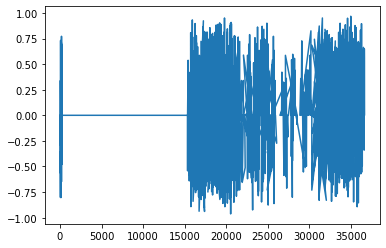

In [170]:
reddit_sentiment_data[reddit_sentiment_data['score'] > 1000]['compound'].plot()

In [171]:
reddit_sentiment_data.set_index('timestamp')
reddit_sentiment_data = reddit_sentiment_data[reddit_sentiment_data['timestamp'] >= '2021-01-28']
reddit_sentiment_data[reddit_sentiment_data['timestamp'] >= '2021-01-28']

,title,score,id,url,comms_num,created,body,timestamp,neg,neu,pos,compound
35874,"Monke brain see pattern, monke brain like 🦍",1,lu9iff,https://i.redd.it/xnw9a95m16k61.jpg,0,1.614524e+09,NaN,2021-02-28 16:53:18,0.000,0.706,0.294,0.3612
35875,NAK?,1,lu9hpg,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614524e+09,NaN,2021-02-28 16:51:59,0.000,1.000,0.000,0.0000
35876,A weed stock no one is thinking about,3,lu9hb1,https://www.reddit.com/r/wallstreetbets/commen...,1,1.614524e+09,"OTCMKTS: DIGP, digipath, is a company that doe...",2021-02-28 16:51:10,0.268,0.732,0.000,-0.2960
35877,Should I take the plunge for 5 shares at 100 o...,2,lu9h4o,https://www.reddit.com/r/wallstreetbets/commen...,2,1.614524e+09,Should I do or just suck it up and invest in m...,2021-02-28 16:50:49,0.187,0.634,0.180,-0.0516
35878,Palantir ?,0,lu9gn9,https://www.reddit.com/r/wallstreetbets/commen...,3,1.614524e+09,Tom Nash target price of 40. WSB target price ...,2021-02-28 16:49:53,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
253,What are you doing to AMC?,67,l6h5b8,https://www.reddit.com/r/wallstreetbets/commen...,55,1.611818e+09,Hey retards what the hell is going on with AMC...,2021-01-28 09:08:21,0.000,1.000,0.000,0.0000
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\r\n\r\nTop 5...,2021-01-28 09:08:19,0.000,1.000,0.000,0.0000
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18,0.182,0.818,0.000,-0.5499
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17,0.000,1.000,0.000,0.0000


In [193]:
g = reddit_sentiment_data.groupby(pd.DatetimeIndex(reddit_sentiment_data['timestamp']).normalize())

In [194]:
g.mean()

,score,comms_num,created,neg,neu,pos,compound
timestamp,,,,,,,
2021-01-28,960.609023,142.193818,1.611864e+09,0.085625,0.833974,0.077898,-0.002823
2021-01-29,408.457309,52.371288,1.611882e+09,0.087568,0.833571,0.078035,-0.016153
2021-01-30,4618.594101,515.766152,1.611983e+09,0.075605,0.827749,0.096650,0.043033
2021-01-31,5230.513312,306.713525,1.612077e+09,0.072360,0.829276,0.098373,0.043890
2021-02-01,4230.302036,531.211538,1.612171e+09,0.072024,0.826994,0.100974,0.040971
2021-02-02,786.005326,101.698402,1.612245e+09,0.090959,0.798439,0.110600,0.041187
2021-02-03,983.322361,128.741203,1.612328e+09,0.084825,0.804834,0.108447,0.034761
2021-02-04,955.487732,78.284859,1.612431e+09,0.070729,0.820364,0.108306,0.054564
2021-02-05,200.257121,27.436105,1.612517e+09,0.082281,0.810701,0.104709,0.031186


In [198]:
multiple_stocks['Adj Close']

Symbols,GME
Date,
2021-01-28,193.600006
2021-01-29,325.000000
2021-02-01,225.000000
2021-02-02,90.000000
2021-02-03,92.410004
2021-02-04,53.500000
2021-02-05,63.770000
2021-02-08,60.000000
2021-02-09,50.310001


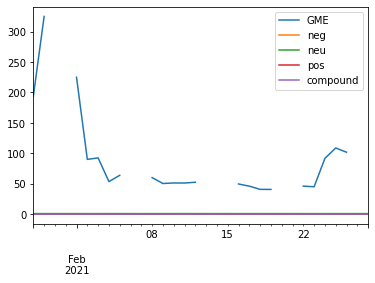

In [200]:
g.mean().join(multiple_stocks['Adj Close'], how='outer')[['GME','neg','neu','pos','compound']].plot()

In [201]:
from sklearn import preprocessing
original = g.mean().join(multiple_stocks['Adj Close'], how='outer')[['GME','neg','neu','pos','compound']]
x = g.mean().join(multiple_stocks['Adj Close'], how='outer')[['GME','compound']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.dropna()
df

,0,1
0,0.537991,0.097024
1,1.000000,0.000000
4,0.648395,0.415778
5,0.173728,0.417353
6,0.182202,0.370576
7,0.045392,0.514715
8,0.081502,0.344555
11,0.068247,0.822140
12,0.034176,0.793040
13,0.037305,0.278612


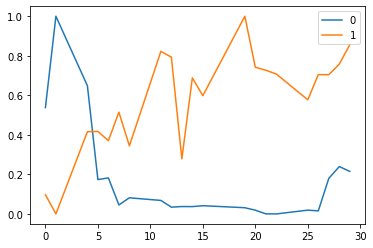

In [202]:
df.plot()

In [242]:
normalized_df=(original-original.mean())/original.std()
#normalized_df = normalized_df.dropna()

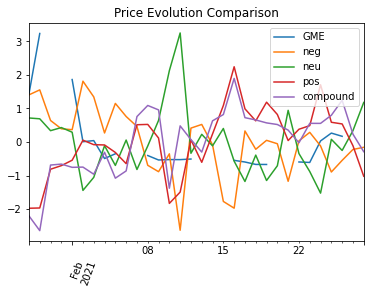

In [243]:
normalized_df.plot()
plt.title('Price Evolution Comparison')
plt.xticks(rotation=70)
plt.legend(normalized_df.columns)
plt.show()

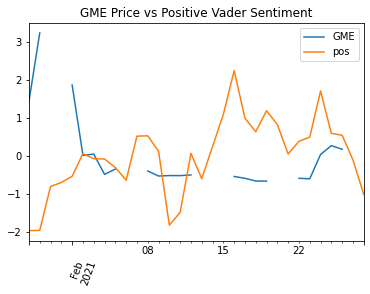

In [244]:
normalized_df[['GME','pos']].plot()
plt.title('GME Price vs Positive Vader Sentiment')
plt.xticks(rotation=70)
plt.legend(normalized_df[['GME','pos']].columns)
plt.show()

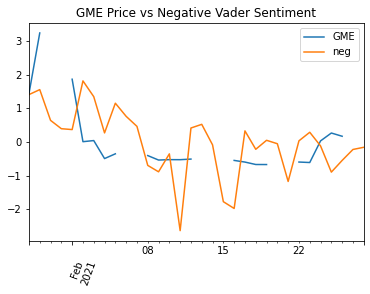

In [245]:
normalized_df[['GME','neg']].plot()
plt.title('GME Price vs Negative Vader Sentiment')
plt.xticks(rotation=70)
plt.legend(normalized_df[['GME','neg']].columns)
plt.show()

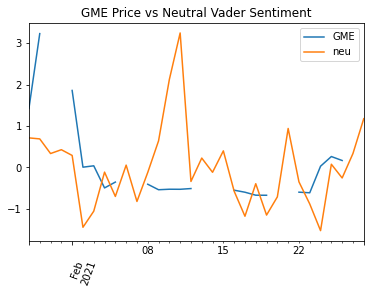

In [246]:
normalized_df[['GME','neu']].plot()
plt.title('GME Price vs Neutral Vader Sentiment')
plt.xticks(rotation=70)
plt.legend(normalized_df[['GME','neu']].columns)
plt.show()

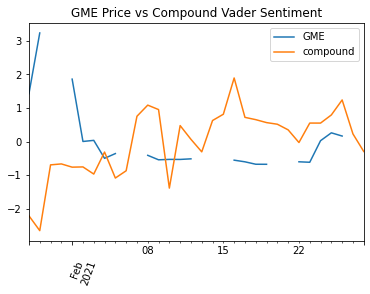

In [247]:
normalized_df[['GME','compound']].plot()
plt.title('GME Price vs Compound Vader Sentiment')
plt.xticks(rotation=70)
plt.legend(normalized_df[['GME','compound']].columns)
plt.show()

In [ ]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 
from math import sqrt
import pandas as pd

def y_generator(x):
    return x**3+0.5*np.random.normal(0,1,1)

# print(y_generator(10))

#Allows a tuple of values to be used as input
f2 = np.vectorize(y_generator)

np.random.seed(100)

#Getting 10 x-values from the x data set
X_training = np.sort(np.random.uniform(-2,2,10))
#Getting 10 y-values from the y data set that has been computed 
y_training = f2(X_training)

print("----X values for training set----")
print(X_training)

print()
print("----Y values for training set----")
print(y_training)

#Hard-coded data for output represents the sales per 5 months for 3 types of cars 
X_Y = {'x': X_training, 'y' : y_training}

#Creates a data frame with the correct order of columns 
df = pd.DataFrame(X_Y,columns=["x","y"])

#Prints out the table
print(df)


plt.plot(X_training,y_training,'o')
plt.xlabel('X-values for Training Set')
plt.ylabel('Y-values for Training Set')
plt.title('Y vs. X for Training Set')
plt.show()